# Case study on Pre-processing
Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.Load the dataset into python environment.

In [2]:
data = pd.read_csv("titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

## 2.Make ‘PassengerId’ as the index column

In [4]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

In [5]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.shape

(891, 11)

## 3.Check the basic details of the dataset

In [7]:
data.shape

(891, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
#checking for null values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

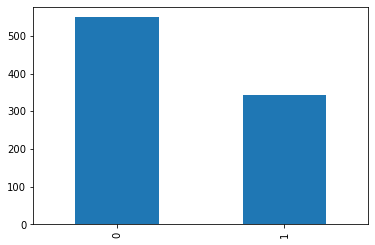

In [14]:
data.Survived.value_counts().plot(kind='bar')

In [15]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
data.groupby("Sex")["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Pclass'>

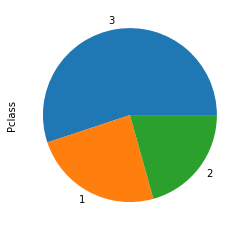

In [18]:
data.Pclass.value_counts().plot(kind='pie')

In [19]:
data[data.Fare==0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

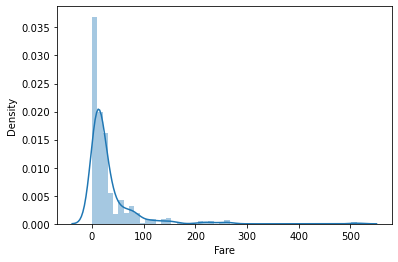

In [20]:
sns.distplot(data.Fare)

## Insights
1. The dataset contains 891 entries.
2. Dataset inculdes 3 types of datas float64,int64 and object ; i.e dataset contains both numerical and categorical data.
3. There were more males than females i.e 577 males and 314 females as the passengers.
4. The dataset contains null values.The columns 'Age','Cabin' and 'Embarked' contain null values.
5. Out of 891 passengers only 342 where survived. In that 233 are females and 109 are males. i.e Only 38% of the passengers    survived.
6. More than 70% of the passengers boarded from Southampton.
7. There were 3 types of passenger classes(1st,2nd,3rd).More than 50% of passengers belonged to 3rd class.
8. There were infants to the elderly as the passengers.
9. The maximum Fare is 512 dollars and there were few passengers(15) travelled free of cost.Most of the passengers didn't      pay too much.


## 4.Fill in all the missing values present in all the columns in the dataset

In [21]:
data.isna().sum() #Checking for null values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [22]:
#check datatypes of the columns
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### Handling missing values in 'Age' column

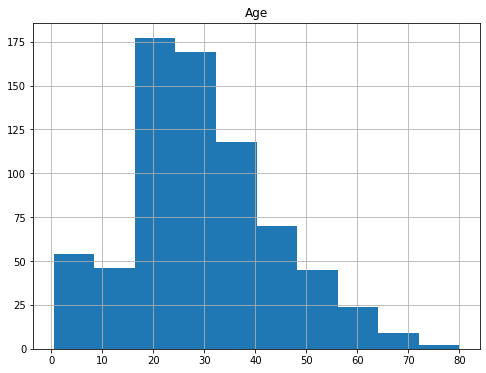

In [23]:
#plot numerical value and check skewness
freqgraph = data[['Age']]
freqgraph.hist(figsize=(8,6))
plt.show()

In [24]:
## Filling missing values of "Age" column with mean
data['Age']=data['Age'].fillna(data['Age'].mean())

#### Handling missing values of 'Cabin' column and 'Embarked' column

In [25]:
# use for loop to fill the missing values of columns 'Cabin','Embarked'.Since these are categorical data we can fill the 
# missing values by mode

for i in ['Cabin','Embarked']:
    data[i]=data[i].fillna(data[i].mode())

In [26]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       686
Embarked      2
dtype: int64

## 5.Check and handle outliers in at least 3 columns in the dataset
       

In [27]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

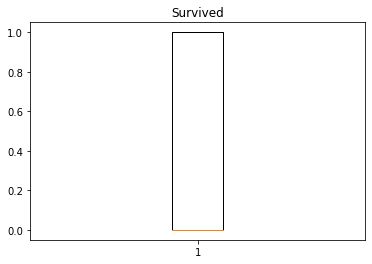

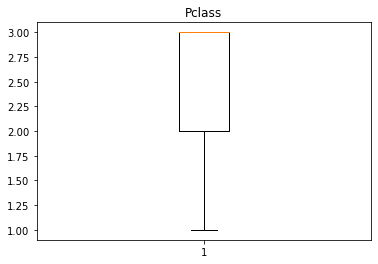

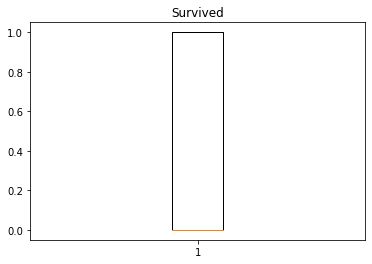

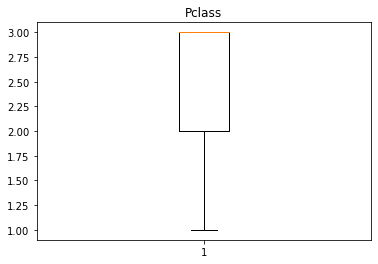

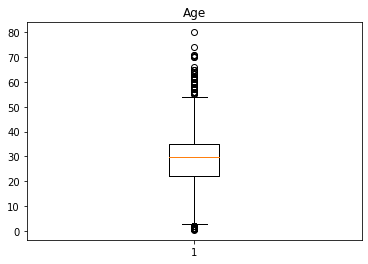

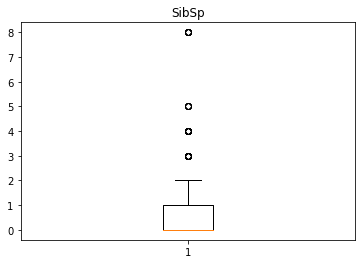

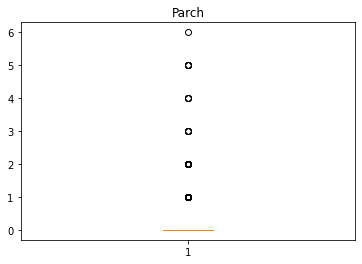

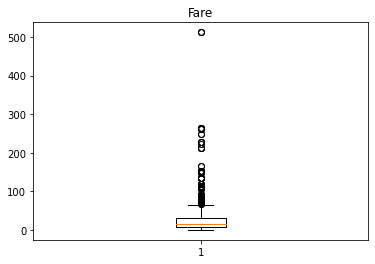

In [28]:
## checking outliers
for i in ['Survived', 'Pclass','Survived', 'Pclass','Age', 'SibSp','Parch', 'Fare']:
    plt.title(i)
    plt.boxplot(data[i])
    plt.show()

### Handling outliers in 'Age' column

In [29]:
q1=np.percentile(data['Age'],25,interpolation='midpoint')
q3=np.percentile(data['Age'],75,interpolation='midpoint')

In [30]:
IQR=q3-q1
low_limit=q1-IQR*1.5
high_limit=q3+IQR*1.5

In [31]:
## finding the index of those outliers
index=data['Age'][(data['Age']<low_limit) | (data['Age']>high_limit)].index
index

Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [32]:
## dropping that index
data.drop(index,inplace=True)

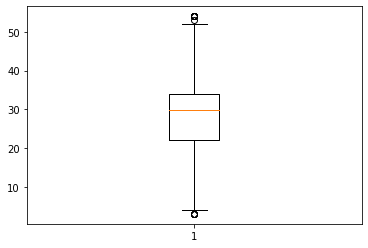

In [33]:
plt.boxplot(data['Age'])
plt.show() 

### Handling outliers in 'SibSp' column

In [34]:
q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [35]:
IQR=q3-q1
low_limit=q1-IQR*1.5
high_limit=q3+IQR*1.5

In [36]:
## finding the index of those outliers
index=data['SibSp'][(data['SibSp']<low_limit) | (data['SibSp']>high_limit)].index
index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [37]:
## dropping that index
data.drop(index,inplace=True)

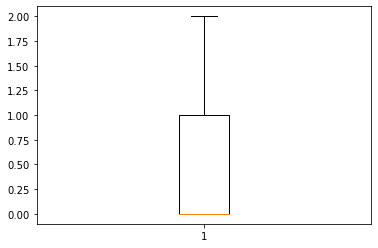

In [38]:
plt.boxplot(data['SibSp'])
plt.show() 

### Handling outliers in 'Fare' column

In [39]:
q1=np.percentile(data['Fare'],25,interpolation='midpoint')
q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [40]:
IQR=q3-q1
low_limit=q1-IQR*1.5
high_limit=q3+IQR*1.5

In [41]:
## finding the index of those outliers
index=data['Fare'][(data['Fare']<low_limit) | (data['Fare']>high_limit)].index
index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=102)

In [42]:
## dropping that index
data.drop(index,inplace=True)

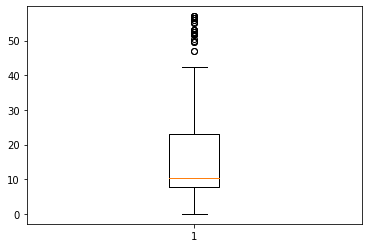

In [43]:
plt.boxplot(data['Fare'])
plt.show() 

## 6.Do min max scaling on the feature set (Take ‘Survived’ as target)

<AxesSubplot:>

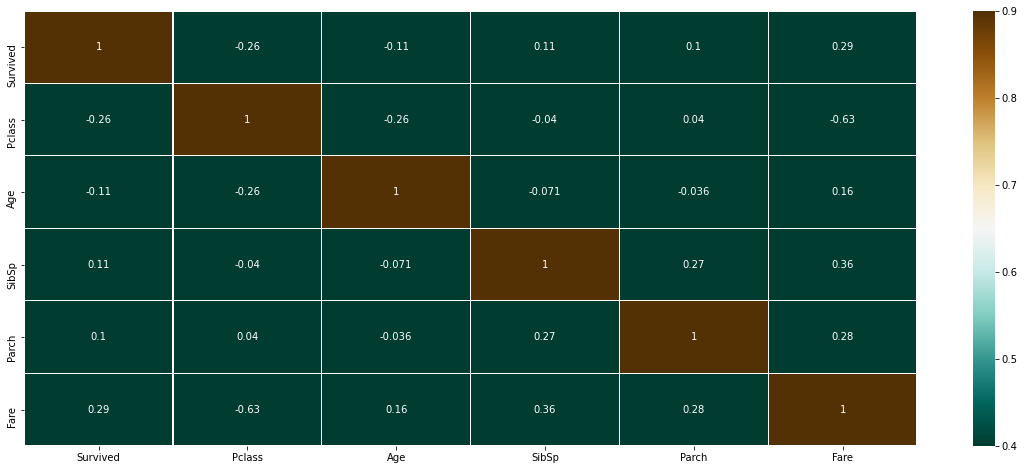

In [44]:
#we can plot heatmap to know the correlation of the variables
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='BrBG_r')

* All the values are below 0.4 i.e We have very low correlation between the variables.

In [45]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [46]:
x=data.drop(['Name','Survived','Sex','Ticket','Cabin','Embarked'],axis=1)
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,2.504386,29.005059,0.271930,0.267544,16.317275
std,0.714816,9.440358,0.500982,0.755690,12.611508
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,29.699118,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.062500
max,3.000000,54.000000,2.000000,6.000000,57.000000


In [47]:
type(x)

pandas.core.frame.DataFrame

In [48]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [49]:
x=min_max.fit_transform(x)
x

array([[1.        , 0.37254902, 0.5       , 0.        , 0.12719298],
       [1.        , 0.45098039, 0.        , 0.        , 0.13903509],
       [0.        , 0.62745098, 0.5       , 0.        , 0.93157895],
       ...,
       [1.        , 0.52351211, 0.5       , 0.33333333, 0.41140351],
       [0.        , 0.45098039, 0.        , 0.        , 0.52631579],
       [1.        , 0.56862745, 0.        , 0.        , 0.13596491]])

In [50]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.752193,0.509903,0.135965,0.044591,0.286268
std,0.357408,0.185105,0.250491,0.125948,0.221255
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.000000,0.000000,0.137793
50%,1.000000,0.523512,0.000000,0.000000,0.184211
75%,1.000000,0.588235,0.000000,0.000000,0.404605
max,1.000000,1.000000,1.000000,1.000000,1.000000


* Now the range of the variable varies between 0 and 1.

In [51]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [52]:
#to check linear regression model
y=data['Survived']
x=data.drop(['Name','Survived','Sex','Ticket','Cabin','Embarked'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [53]:
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.19563021376841838
R squared value is: 0.12284197749177139


* We got a very low MSE value(very close to zero) after minmax scaling 